In [1]:
import numpy as np
import pandas as pd
import xlrd
import openpyxl
from pathlib import Path
from PIL import Image
import glob
import os
import matplotlib.pyplot as plt
import cv2
import skimage.io
from scipy import misc, ndimage
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

In [2]:
#Preprocessing the labels

In [3]:
my_file = Path("Final_data.csv")
if not my_file.is_file():
    # file doesn't exists
    data_row = []
    data_label = []
    excelfile = openpyxl.load_workbook('Rating_Collection/Attractiveness label.xlsx')  # open a excel file with .xlsx format
    excelfile.get_sheet_names()  # get names of all spreadsheet in the file
    sheet1 = excelfile.get_sheet_by_name("Sheet1")  # get the first spreadsheet by name
    sheet1.max_row  # get the number of rows in the sheet
    sheet1.max_column  # get the number of columns in the sheet
    sheet1["A10"].value  # read the value in the cell A10
    sheet1.cell(row=10, column=1).value  # another way to read the cell A10

    # read the whole spreadsheet
    for row_index in range(1, (sheet1.max_row+1)):
        data_row.append(row_index)
        print ("Row:", row_index)
        for col_index in range(1, (sheet1.max_column+1)):
            data_label.append(sheet1.cell(row=row_index, column=col_index).value )
            #data_label.append(sheet1.cell(row=row_index, column=col_index + 1).value )
            print ("Column:", col_index, sheet1.cell(row=row_index, column=col_index).value )  # Get cell object by row, col
    data_label = np.array(data_label)
    data_label = data_label.reshape(501,3)
    data = pd.DataFrame(data_label)
    data.columns = ["Image_no.", "Attractivenss label", "Standard Deviation"]
    data = data.drop(0)
    print(data.head())
    data.to_csv('Final_data.csv')

In [4]:
#Loading images and labels on Notebook

In [5]:
labels_data = pd.read_csv('Final_data.csv')
del labels_data['Unnamed: 0']

In [6]:
img_data = 'Data_Collection/'

In [7]:
image_list = {}
images =np.arange(1,502)

In [8]:
for filename in glob.glob('Data_Collection/*.jpg'):
    count = filename.split("SCUT-FBP-")[1]
    count = int(count.split(".")[0])
    print(count)
    #print(filename)
    im=Image.open(filename)
    image_list[images[count]] = im

114
100
12
128
316
470
464
302
458
289
262
276
277
263
288
459
465
303
317
471
129
101
13
115
11
103
117
39
498
301
467
473
315
329
275
261
249
248
260
274
328
472
314
300
466
499
38
116
10
102
28
106
14
112
489
338
462
304
310
476
258
270
264
265
271
259
311
477
463
305
339
488
113
107
15
29
139
111
17
105
449
475
313
307
461
298
267
273
272
500
266
299
306
460
474
312
448
16
104
110
138
188
177
65
71
163
59
413
375
361
407
349
201
215
229
8
9
228
214
200
348
360
406
412
374
58
70
162
176
64
189
99
160
72
66
174
148
389
404
362
376
410
438
216
202
203
217
439
377
411
405
363
388
149
67
175
161
73
98
88
159
77
165
171
63
398
429
367
401
415
373
213
207
206
212
414
372
366
400
428
399
170
62
76
164
158
89
199
48
60
172
166
74
358
370
416
402
364
238
204
210
211
205
239
403
365
371
417
359
167
75
61
173
49
198
195
87
93
181
156
44
50
142
78
397
383
432
354
340
426
368
220


/Users/DBRSJ/anaconda/envs/tf_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:709: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


234
208
1
209
235
221
369
341
427
433
355
382
396
79
51
143
157
45
92
180
194
86
182
90
84
196
141
53
47
155
169
380
394
425
343
357
431
419
237
223
2
3
222
236
418
356
430
424
342
395
381
168
46
154
140
52
85
197
183
91
95
187
193
81
178
56
144
150
42
385
391
408
346
420
434
352
232
226
7
6
227
233
435
353
347
421
409
390
384
151
43
57
145
179
192
80
94
186
82
190
184
96
69
41
153
147
55
392
386
379
351
437
423
345
219
225
231
4
5
230
224
218
422
344
350
436
378
387
393
146
54
40
152
68
185
97
83
191
27
135
121
33
109
492
486
337
451
445
323
479
280
294
243
257
256
242
295
281
478
444
322
336
450
487
493
108
120
32
26
134
30
122
136
24
18
485
491
320
446
452
334
308
297
283
254
240
268
269
241
255
282
296
309
453
335
321
447
490
484
19
137
25
31
123
127
35
21
133
480
494
319
443
325
331
457
292
286
279
251
245
244
250
278
287
293
330
456
442
324
318
495
481
20
132
126
34
118
130
22
36
124
497
483
468
454
332
326
440
285
291
246
252
253
247
290
284
327
441
455
333
469
482
496
37
125
13

In [9]:
#loaded sorted images
new_image_list = {}
new_key = np.arange(1,500)
for num in range(1,len(image_list.keys())+1):
    new_image_list[num] = image_list[num + 1]

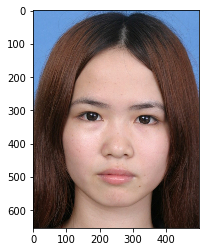

3.3571428571428568

In [10]:
plt.imshow(new_image_list[1])
plt.show() 
labels_data["Attractivenss label"][1]

In [11]:
# Images are not equally sized, so resizing and reshaping them

In [12]:
my_file = Path("resized/")
if not my_file.is_dir():
    # dir doesn't exists
    dir ='Data_Collection/'
    output_dir = "resized"
    if not os.path.exists(output_dir):
        os.mkdir(output_dir)

    size = (600,600)
    for file in os.listdir(dir):
        outfile = os.path.splitext(file)[0]+"_resized"
        extension = os.path.splitext(file)[1]

        if file != outfile:
            try :
                im = Image.open(dir+os.sep+file)
                im.thumbnail(size, Image.ANTIALIAS)
                im.save(output_dir+os.sep+outfile+extension,"JPEG")
            except IOError:
                print ("cannot reduce image for ", file)

In [13]:
for filename in glob.glob('resized/*.jpg'):
    count = filename.split("SCUT-FBP-")[1]
    count = int(count.split("_")[0])
    print(count)
    #print(filename)
    im=Image.open(filename)
    image_list[images[count]] = im

454
104
189
424
174
363
201
487
7
313
72
271
290
93
146
416
382
136
466
438
168
321
40
243
195
448
118
351
30
233
334
256
55
180
344
226
25
278
86
285
403
153
208
397
473
123
376
214
17
492
306
299
264
67
39
358
111
441
49
328
161
431
476
126
392
83
280
406
156
223
20
108
458
341
253
50
185
178
428
331
164
434
199
114
444
261
62
303
211
12
497
373
77
274
2
289
316
204
482
366
338
421
171
59
348
451
101
29
35
236
354
45
246
190
324
133
463
387
218
295
96
143
413
268
18
384
130
460
379
68
140
410
296
309
95
357
36
235
327
193
46
245
259
422
172
229
452
102
89
315
1
74
277
365
481
398
207
300
419
149
262
61
370
469
139
494
212
11
167
437
117
447
342
220
23
332
186
250
53
391
488
475
125
405
155
8
80
283
112
442
239
162
432
249
491
217
14
388
375
267
64
305
99
400
150
85
319
286
78
470
120
369
394
183
255
56
337
225
26
347
196
43
240
322
33
230
352
145
415
293
90
135
465
381
498
484
202
360
129
479
71
272
310
159
4
409
457
107
427
177
325
191
247
44
355
237
34
269
412
142
97
294
219
386
50

In [14]:
#loaded sorted images
new_image_list = {}
new_key = np.arange(1,500)
for num in range(1,len(image_list.keys())+1):
    new_image_list[num] = image_list[num + 1]

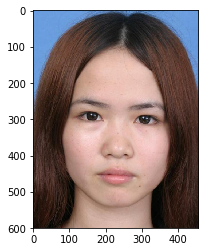

3.3571428571428568

In [15]:
plt.imshow(new_image_list[1])
plt.show() 
labels_data["Attractivenss label"][1]

In [16]:
# Data Augumentation

In [17]:
arr = np.array(new_image_list[1])
print(type(arr))
arr.shape

<class 'numpy.ndarray'>


(600, 456, 3)

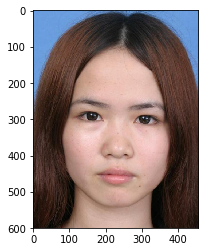

In [18]:
plt.imshow(arr)
plt.show()

In [19]:
arr_img = {}

In [20]:
for i in range(1,len(new_image_list)+1):
    arr_img[i] = np.array(new_image_list[i])

In [21]:
arr_img[1].shape

(600, 456, 3)

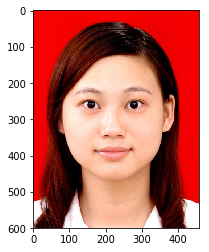

In [22]:
plt.imshow(arr_img[500])
plt.show()

In [23]:
labels_data["Attractivenss label"].idxmax(), labels_data["Attractivenss label"].max()

(109, 4.8888888888888893)

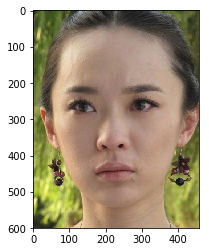

In [24]:
plt.imshow(arr_img[109])
plt.show()

In [25]:
gen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1,
                        height_shift_range=0.1, shear_range=0.15,
                        zoom_range = 0.1, channel_shift_range=10,
                        horizontal_flip = True)


In [26]:
image_path = 'resized/SCUT-FBP-100_resized.jpg'

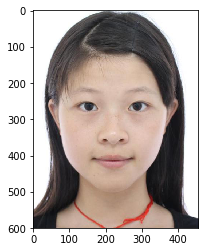

In [27]:
plt.imshow(Image.open(image_path))
plt.show()

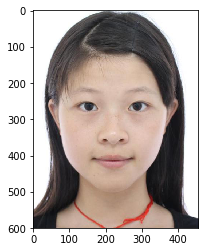

In [28]:
#Obtain image
image = np.expand_dims(ndimage.imread(image_path),0)
plt.imshow(image[0])
plt.show()

In [29]:
#Generate batches of augumented images from this image
aug_iter = gen.flow(image)


In [30]:
#Get 10 samples of augumented images
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

In [31]:
aug_images[1].shape ,aug_images[0].shape

((600, 456, 3), (600, 456, 3))

In [32]:
type(aug_images[1])

numpy.ndarray

In [33]:
type(aug_images)

list

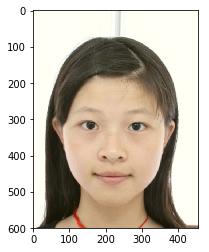

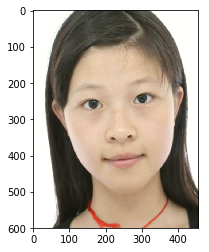

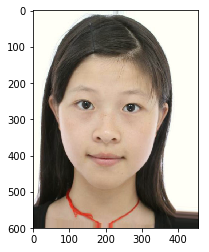

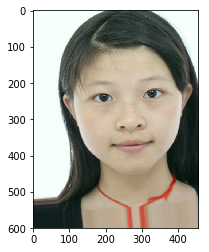

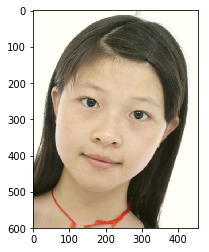

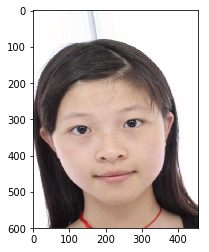

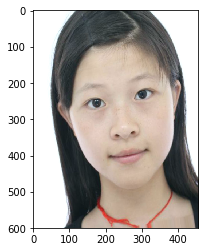

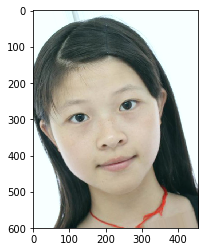

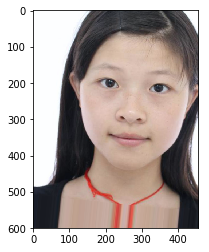

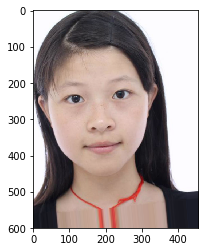

In [34]:
for i in range(10):
    image_show = aug_images[i]
    plt.imshow(image_show)
    plt.show()

In [35]:
# folder = "Augumented"
# i  =10
# name = 'Jasneet'
# t= 'There'
# cv2.imwrite(folder+"/"+name+t+i+".jpg",cv2.cvtColor(aug_images[0], cv2.COLOR_RGB2BGR))

In [36]:
#Above is augumentation on single image, now doing it for complete dataset

In [37]:
def Data_Augumentor(image_path):
    image = np.expand_dims(ndimage.imread(image_path),0)
    aug_iter = gen.flow(image)
    aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]
    return aug_images

In [38]:
my_file = Path("Augumented/")
if not my_file.is_dir():
    # dir doesn't exists
    dir = 'resized/'
    output_dir = "Augumented"
    if not os.path.exists(output_dir):
        os.mkdir(output_dir)

    for file in os.listdir(dir):
        outfolder = os.path.splitext(file)[0]
        extension = os.path.splitext(file)[1]
        if file != outfolder:
            try :
                os.mkdir(output_dir+os.sep+outfolder)
                augumented_images = Data_Augumentor(dir+file)
                for i in range(10):
                    cv2.imwrite(output_dir+os.sep+outfolder+"/"+str(i)+".jpg",cv2.cvtColor(augumented_images[i], cv2.COLOR_RGB2BGR))
            except IOError:
                print ("cannot save image for ", file)

In [39]:
#now reszing the images for uniformity

In [46]:
my_file = Path("resized_Aug/")
if not my_file.is_dir():
    # dir doesn't exists
    dir ='Augumented/'
    output_dir = "resized_Aug"
    if not os.path.exists(output_dir):
        os.mkdir(output_dir)

    size = (250,250)
    for (dirname, dirs, files) in os.walk(dir):
        for dirs_ in dirs:   #uncomment these lines for first run, if the folders are not present
            os.mkdir(output_dir+'/'+dirs_)
    for (dirname, dirs, files) in os.walk(dir):
        for dirs_ in dirs:
            for file in os.listdir(dir + dirs_):
                print(dir+dirs_+file)
                im = Image.open(dir+dirs_+'/'+file)
                im.thumbnail(size, Image.ANTIALIAS)
                im.save('resized_Aug/'+dirs_+os.sep+file,"JPEG")
                print('saved '+'resized_Aug/'+dirs_+os.sep+file)


Augumented/SCUT-FBP-303_resized8.jpg
saved resized_Aug/SCUT-FBP-303_resized/8.jpg
Augumented/SCUT-FBP-303_resized9.jpg
saved resized_Aug/SCUT-FBP-303_resized/9.jpg
Augumented/SCUT-FBP-303_resized4.jpg
saved resized_Aug/SCUT-FBP-303_resized/4.jpg
Augumented/SCUT-FBP-303_resized5.jpg
saved resized_Aug/SCUT-FBP-303_resized/5.jpg
Augumented/SCUT-FBP-303_resized7.jpg
saved resized_Aug/SCUT-FBP-303_resized/7.jpg
Augumented/SCUT-FBP-303_resized6.jpg
saved resized_Aug/SCUT-FBP-303_resized/6.jpg
Augumented/SCUT-FBP-303_resized2.jpg
saved resized_Aug/SCUT-FBP-303_resized/2.jpg
Augumented/SCUT-FBP-303_resized3.jpg
saved resized_Aug/SCUT-FBP-303_resized/3.jpg
Augumented/SCUT-FBP-303_resized1.jpg
saved resized_Aug/SCUT-FBP-303_resized/1.jpg
Augumented/SCUT-FBP-303_resized0.jpg
saved resized_Aug/SCUT-FBP-303_resized/0.jpg
Augumented/SCUT-FBP-313_resized8.jpg
saved resized_Aug/SCUT-FBP-313_resized/8.jpg
Augumented/SCUT-FBP-313_resized9.jpg
saved resized_Aug/SCUT-FBP-313_resized/9.jpg
Augumented/SCUT-

saved resized_Aug/SCUT-FBP-371_resized/5.jpg
Augumented/SCUT-FBP-371_resized7.jpg
saved resized_Aug/SCUT-FBP-371_resized/7.jpg
Augumented/SCUT-FBP-371_resized6.jpg
saved resized_Aug/SCUT-FBP-371_resized/6.jpg
Augumented/SCUT-FBP-371_resized2.jpg
saved resized_Aug/SCUT-FBP-371_resized/2.jpg
Augumented/SCUT-FBP-371_resized3.jpg
saved resized_Aug/SCUT-FBP-371_resized/3.jpg
Augumented/SCUT-FBP-371_resized1.jpg
saved resized_Aug/SCUT-FBP-371_resized/1.jpg
Augumented/SCUT-FBP-371_resized0.jpg
saved resized_Aug/SCUT-FBP-371_resized/0.jpg
Augumented/SCUT-FBP-209_resized8.jpg
saved resized_Aug/SCUT-FBP-209_resized/8.jpg
Augumented/SCUT-FBP-209_resized9.jpg
saved resized_Aug/SCUT-FBP-209_resized/9.jpg
Augumented/SCUT-FBP-209_resized4.jpg
saved resized_Aug/SCUT-FBP-209_resized/4.jpg
Augumented/SCUT-FBP-209_resized5.jpg
saved resized_Aug/SCUT-FBP-209_resized/5.jpg
Augumented/SCUT-FBP-209_resized7.jpg
saved resized_Aug/SCUT-FBP-209_resized/7.jpg
Augumented/SCUT-FBP-209_resized6.jpg
saved resized_Au

saved resized_Aug/SCUT-FBP-236_resized/6.jpg
Augumented/SCUT-FBP-236_resized2.jpg
saved resized_Aug/SCUT-FBP-236_resized/2.jpg
Augumented/SCUT-FBP-236_resized3.jpg
saved resized_Aug/SCUT-FBP-236_resized/3.jpg
Augumented/SCUT-FBP-236_resized1.jpg
saved resized_Aug/SCUT-FBP-236_resized/1.jpg
Augumented/SCUT-FBP-236_resized0.jpg
saved resized_Aug/SCUT-FBP-236_resized/0.jpg
Augumented/SCUT-FBP-473_resized8.jpg
saved resized_Aug/SCUT-FBP-473_resized/8.jpg
Augumented/SCUT-FBP-473_resized9.jpg
saved resized_Aug/SCUT-FBP-473_resized/9.jpg
Augumented/SCUT-FBP-473_resized4.jpg
saved resized_Aug/SCUT-FBP-473_resized/4.jpg
Augumented/SCUT-FBP-473_resized5.jpg
saved resized_Aug/SCUT-FBP-473_resized/5.jpg
Augumented/SCUT-FBP-473_resized7.jpg
saved resized_Aug/SCUT-FBP-473_resized/7.jpg
Augumented/SCUT-FBP-473_resized6.jpg
saved resized_Aug/SCUT-FBP-473_resized/6.jpg
Augumented/SCUT-FBP-473_resized2.jpg
saved resized_Aug/SCUT-FBP-473_resized/2.jpg
Augumented/SCUT-FBP-473_resized3.jpg
saved resized_Au

saved resized_Aug/SCUT-FBP-210_resized/0.jpg
Augumented/SCUT-FBP-93_resized8.jpg
saved resized_Aug/SCUT-FBP-93_resized/8.jpg
Augumented/SCUT-FBP-93_resized9.jpg
saved resized_Aug/SCUT-FBP-93_resized/9.jpg
Augumented/SCUT-FBP-93_resized4.jpg
saved resized_Aug/SCUT-FBP-93_resized/4.jpg
Augumented/SCUT-FBP-93_resized5.jpg
saved resized_Aug/SCUT-FBP-93_resized/5.jpg
Augumented/SCUT-FBP-93_resized7.jpg
saved resized_Aug/SCUT-FBP-93_resized/7.jpg
Augumented/SCUT-FBP-93_resized6.jpg
saved resized_Aug/SCUT-FBP-93_resized/6.jpg
Augumented/SCUT-FBP-93_resized2.jpg
saved resized_Aug/SCUT-FBP-93_resized/2.jpg
Augumented/SCUT-FBP-93_resized3.jpg
saved resized_Aug/SCUT-FBP-93_resized/3.jpg
Augumented/SCUT-FBP-93_resized1.jpg
saved resized_Aug/SCUT-FBP-93_resized/1.jpg
Augumented/SCUT-FBP-93_resized0.jpg
saved resized_Aug/SCUT-FBP-93_resized/0.jpg
Augumented/SCUT-FBP-455_resized8.jpg
saved resized_Aug/SCUT-FBP-455_resized/8.jpg
Augumented/SCUT-FBP-455_resized9.jpg
saved resized_Aug/SCUT-FBP-455_resiz

saved resized_Aug/SCUT-FBP-48_resized/8.jpg
Augumented/SCUT-FBP-48_resized9.jpg
saved resized_Aug/SCUT-FBP-48_resized/9.jpg
Augumented/SCUT-FBP-48_resized4.jpg
saved resized_Aug/SCUT-FBP-48_resized/4.jpg
Augumented/SCUT-FBP-48_resized5.jpg
saved resized_Aug/SCUT-FBP-48_resized/5.jpg
Augumented/SCUT-FBP-48_resized7.jpg
saved resized_Aug/SCUT-FBP-48_resized/7.jpg
Augumented/SCUT-FBP-48_resized6.jpg
saved resized_Aug/SCUT-FBP-48_resized/6.jpg
Augumented/SCUT-FBP-48_resized2.jpg
saved resized_Aug/SCUT-FBP-48_resized/2.jpg
Augumented/SCUT-FBP-48_resized3.jpg
saved resized_Aug/SCUT-FBP-48_resized/3.jpg
Augumented/SCUT-FBP-48_resized1.jpg
saved resized_Aug/SCUT-FBP-48_resized/1.jpg
Augumented/SCUT-FBP-48_resized0.jpg
saved resized_Aug/SCUT-FBP-48_resized/0.jpg
Augumented/SCUT-FBP-58_resized8.jpg
saved resized_Aug/SCUT-FBP-58_resized/8.jpg
Augumented/SCUT-FBP-58_resized9.jpg
saved resized_Aug/SCUT-FBP-58_resized/9.jpg
Augumented/SCUT-FBP-58_resized4.jpg
saved resized_Aug/SCUT-FBP-58_resized/4.

saved resized_Aug/SCUT-FBP-77_resized/5.jpg
Augumented/SCUT-FBP-77_resized7.jpg
saved resized_Aug/SCUT-FBP-77_resized/7.jpg
Augumented/SCUT-FBP-77_resized6.jpg
saved resized_Aug/SCUT-FBP-77_resized/6.jpg
Augumented/SCUT-FBP-77_resized2.jpg
saved resized_Aug/SCUT-FBP-77_resized/2.jpg
Augumented/SCUT-FBP-77_resized3.jpg
saved resized_Aug/SCUT-FBP-77_resized/3.jpg
Augumented/SCUT-FBP-77_resized1.jpg
saved resized_Aug/SCUT-FBP-77_resized/1.jpg
Augumented/SCUT-FBP-77_resized0.jpg
saved resized_Aug/SCUT-FBP-77_resized/0.jpg
Augumented/SCUT-FBP-67_resized8.jpg
saved resized_Aug/SCUT-FBP-67_resized/8.jpg
Augumented/SCUT-FBP-67_resized9.jpg
saved resized_Aug/SCUT-FBP-67_resized/9.jpg
Augumented/SCUT-FBP-67_resized4.jpg
saved resized_Aug/SCUT-FBP-67_resized/4.jpg
Augumented/SCUT-FBP-67_resized5.jpg
saved resized_Aug/SCUT-FBP-67_resized/5.jpg
Augumented/SCUT-FBP-67_resized7.jpg
saved resized_Aug/SCUT-FBP-67_resized/7.jpg
Augumented/SCUT-FBP-67_resized6.jpg
saved resized_Aug/SCUT-FBP-67_resized/6.

saved resized_Aug/SCUT-FBP-82_resized/9.jpg
Augumented/SCUT-FBP-82_resized4.jpg
saved resized_Aug/SCUT-FBP-82_resized/4.jpg
Augumented/SCUT-FBP-82_resized5.jpg
saved resized_Aug/SCUT-FBP-82_resized/5.jpg
Augumented/SCUT-FBP-82_resized7.jpg
saved resized_Aug/SCUT-FBP-82_resized/7.jpg
Augumented/SCUT-FBP-82_resized6.jpg
saved resized_Aug/SCUT-FBP-82_resized/6.jpg
Augumented/SCUT-FBP-82_resized2.jpg
saved resized_Aug/SCUT-FBP-82_resized/2.jpg
Augumented/SCUT-FBP-82_resized3.jpg
saved resized_Aug/SCUT-FBP-82_resized/3.jpg
Augumented/SCUT-FBP-82_resized1.jpg
saved resized_Aug/SCUT-FBP-82_resized/1.jpg
Augumented/SCUT-FBP-82_resized0.jpg
saved resized_Aug/SCUT-FBP-82_resized/0.jpg
Augumented/SCUT-FBP-92_resized8.jpg
saved resized_Aug/SCUT-FBP-92_resized/8.jpg
Augumented/SCUT-FBP-92_resized9.jpg
saved resized_Aug/SCUT-FBP-92_resized/9.jpg
Augumented/SCUT-FBP-92_resized4.jpg
saved resized_Aug/SCUT-FBP-92_resized/4.jpg
Augumented/SCUT-FBP-92_resized5.jpg
saved resized_Aug/SCUT-FBP-92_resized/5.

saved resized_Aug/SCUT-FBP-426_resized/9.jpg
Augumented/SCUT-FBP-426_resized4.jpg
saved resized_Aug/SCUT-FBP-426_resized/4.jpg
Augumented/SCUT-FBP-426_resized5.jpg
saved resized_Aug/SCUT-FBP-426_resized/5.jpg
Augumented/SCUT-FBP-426_resized7.jpg
saved resized_Aug/SCUT-FBP-426_resized/7.jpg
Augumented/SCUT-FBP-426_resized6.jpg
saved resized_Aug/SCUT-FBP-426_resized/6.jpg
Augumented/SCUT-FBP-426_resized2.jpg
saved resized_Aug/SCUT-FBP-426_resized/2.jpg
Augumented/SCUT-FBP-426_resized3.jpg
saved resized_Aug/SCUT-FBP-426_resized/3.jpg
Augumented/SCUT-FBP-426_resized1.jpg
saved resized_Aug/SCUT-FBP-426_resized/1.jpg
Augumented/SCUT-FBP-426_resized0.jpg
saved resized_Aug/SCUT-FBP-426_resized/0.jpg
Augumented/SCUT-FBP-436_resized8.jpg
saved resized_Aug/SCUT-FBP-436_resized/8.jpg
Augumented/SCUT-FBP-436_resized9.jpg
saved resized_Aug/SCUT-FBP-436_resized/9.jpg
Augumented/SCUT-FBP-436_resized4.jpg
saved resized_Aug/SCUT-FBP-436_resized/4.jpg
Augumented/SCUT-FBP-436_resized5.jpg
saved resized_Au

saved resized_Aug/SCUT-FBP-148_resized/3.jpg
Augumented/SCUT-FBP-148_resized1.jpg
saved resized_Aug/SCUT-FBP-148_resized/1.jpg
Augumented/SCUT-FBP-148_resized0.jpg
saved resized_Aug/SCUT-FBP-148_resized/0.jpg
Augumented/SCUT-FBP-158_resized8.jpg
saved resized_Aug/SCUT-FBP-158_resized/8.jpg
Augumented/SCUT-FBP-158_resized9.jpg
saved resized_Aug/SCUT-FBP-158_resized/9.jpg
Augumented/SCUT-FBP-158_resized4.jpg
saved resized_Aug/SCUT-FBP-158_resized/4.jpg
Augumented/SCUT-FBP-158_resized5.jpg
saved resized_Aug/SCUT-FBP-158_resized/5.jpg
Augumented/SCUT-FBP-158_resized7.jpg
saved resized_Aug/SCUT-FBP-158_resized/7.jpg
Augumented/SCUT-FBP-158_resized6.jpg
saved resized_Aug/SCUT-FBP-158_resized/6.jpg
Augumented/SCUT-FBP-158_resized2.jpg
saved resized_Aug/SCUT-FBP-158_resized/2.jpg
Augumented/SCUT-FBP-158_resized3.jpg
saved resized_Aug/SCUT-FBP-158_resized/3.jpg
Augumented/SCUT-FBP-158_resized1.jpg
saved resized_Aug/SCUT-FBP-158_resized/1.jpg
Augumented/SCUT-FBP-158_resized0.jpg
saved resized_Au

saved resized_Aug/SCUT-FBP-40_resized/1.jpg
Augumented/SCUT-FBP-40_resized0.jpg
saved resized_Aug/SCUT-FBP-40_resized/0.jpg
Augumented/SCUT-FBP-486_resized8.jpg
saved resized_Aug/SCUT-FBP-486_resized/8.jpg
Augumented/SCUT-FBP-486_resized9.jpg
saved resized_Aug/SCUT-FBP-486_resized/9.jpg
Augumented/SCUT-FBP-486_resized4.jpg
saved resized_Aug/SCUT-FBP-486_resized/4.jpg
Augumented/SCUT-FBP-486_resized5.jpg
saved resized_Aug/SCUT-FBP-486_resized/5.jpg
Augumented/SCUT-FBP-486_resized7.jpg
saved resized_Aug/SCUT-FBP-486_resized/7.jpg
Augumented/SCUT-FBP-486_resized6.jpg
saved resized_Aug/SCUT-FBP-486_resized/6.jpg
Augumented/SCUT-FBP-486_resized2.jpg
saved resized_Aug/SCUT-FBP-486_resized/2.jpg
Augumented/SCUT-FBP-486_resized3.jpg
saved resized_Aug/SCUT-FBP-486_resized/3.jpg
Augumented/SCUT-FBP-486_resized1.jpg
saved resized_Aug/SCUT-FBP-486_resized/1.jpg
Augumented/SCUT-FBP-486_resized0.jpg
saved resized_Aug/SCUT-FBP-486_resized/0.jpg
Augumented/SCUT-FBP-496_resized8.jpg
saved resized_Aug/S

saved resized_Aug/SCUT-FBP-32_resized/2.jpg
Augumented/SCUT-FBP-32_resized3.jpg
saved resized_Aug/SCUT-FBP-32_resized/3.jpg
Augumented/SCUT-FBP-32_resized1.jpg
saved resized_Aug/SCUT-FBP-32_resized/1.jpg
Augumented/SCUT-FBP-32_resized0.jpg
saved resized_Aug/SCUT-FBP-32_resized/0.jpg
Augumented/SCUT-FBP-133_resized8.jpg
saved resized_Aug/SCUT-FBP-133_resized/8.jpg
Augumented/SCUT-FBP-133_resized9.jpg
saved resized_Aug/SCUT-FBP-133_resized/9.jpg
Augumented/SCUT-FBP-133_resized4.jpg
saved resized_Aug/SCUT-FBP-133_resized/4.jpg
Augumented/SCUT-FBP-133_resized5.jpg
saved resized_Aug/SCUT-FBP-133_resized/5.jpg
Augumented/SCUT-FBP-133_resized7.jpg
saved resized_Aug/SCUT-FBP-133_resized/7.jpg
Augumented/SCUT-FBP-133_resized6.jpg
saved resized_Aug/SCUT-FBP-133_resized/6.jpg
Augumented/SCUT-FBP-133_resized2.jpg
saved resized_Aug/SCUT-FBP-133_resized/2.jpg
Augumented/SCUT-FBP-133_resized3.jpg
saved resized_Aug/SCUT-FBP-133_resized/3.jpg
Augumented/SCUT-FBP-133_resized1.jpg
saved resized_Aug/SCUT-

saved resized_Aug/SCUT-FBP-472_resized/2.jpg
Augumented/SCUT-FBP-472_resized3.jpg
saved resized_Aug/SCUT-FBP-472_resized/3.jpg
Augumented/SCUT-FBP-472_resized1.jpg
saved resized_Aug/SCUT-FBP-472_resized/1.jpg
Augumented/SCUT-FBP-472_resized0.jpg
saved resized_Aug/SCUT-FBP-472_resized/0.jpg
Augumented/SCUT-FBP-237_resized8.jpg
saved resized_Aug/SCUT-FBP-237_resized/8.jpg
Augumented/SCUT-FBP-237_resized9.jpg
saved resized_Aug/SCUT-FBP-237_resized/9.jpg
Augumented/SCUT-FBP-237_resized4.jpg
saved resized_Aug/SCUT-FBP-237_resized/4.jpg
Augumented/SCUT-FBP-237_resized5.jpg
saved resized_Aug/SCUT-FBP-237_resized/5.jpg
Augumented/SCUT-FBP-237_resized7.jpg
saved resized_Aug/SCUT-FBP-237_resized/7.jpg
Augumented/SCUT-FBP-237_resized6.jpg
saved resized_Aug/SCUT-FBP-237_resized/6.jpg
Augumented/SCUT-FBP-237_resized2.jpg
saved resized_Aug/SCUT-FBP-237_resized/2.jpg
Augumented/SCUT-FBP-237_resized3.jpg
saved resized_Aug/SCUT-FBP-237_resized/3.jpg
Augumented/SCUT-FBP-237_resized1.jpg
saved resized_Au

saved resized_Aug/SCUT-FBP-271_resized/7.jpg
Augumented/SCUT-FBP-271_resized6.jpg
saved resized_Aug/SCUT-FBP-271_resized/6.jpg
Augumented/SCUT-FBP-271_resized2.jpg
saved resized_Aug/SCUT-FBP-271_resized/2.jpg
Augumented/SCUT-FBP-271_resized3.jpg
saved resized_Aug/SCUT-FBP-271_resized/3.jpg
Augumented/SCUT-FBP-271_resized1.jpg
saved resized_Aug/SCUT-FBP-271_resized/1.jpg
Augumented/SCUT-FBP-271_resized0.jpg
saved resized_Aug/SCUT-FBP-271_resized/0.jpg
Augumented/SCUT-FBP-309_resized8.jpg
saved resized_Aug/SCUT-FBP-309_resized/8.jpg
Augumented/SCUT-FBP-309_resized9.jpg
saved resized_Aug/SCUT-FBP-309_resized/9.jpg
Augumented/SCUT-FBP-309_resized4.jpg
saved resized_Aug/SCUT-FBP-309_resized/4.jpg
Augumented/SCUT-FBP-309_resized5.jpg
saved resized_Aug/SCUT-FBP-309_resized/5.jpg
Augumented/SCUT-FBP-309_resized7.jpg
saved resized_Aug/SCUT-FBP-309_resized/7.jpg
Augumented/SCUT-FBP-309_resized6.jpg
saved resized_Aug/SCUT-FBP-309_resized/6.jpg
Augumented/SCUT-FBP-309_resized2.jpg
saved resized_Au

saved resized_Aug/SCUT-FBP-29_resized/0.jpg
Augumented/SCUT-FBP-39_resized8.jpg
saved resized_Aug/SCUT-FBP-39_resized/8.jpg
Augumented/SCUT-FBP-39_resized9.jpg
saved resized_Aug/SCUT-FBP-39_resized/9.jpg
Augumented/SCUT-FBP-39_resized4.jpg
saved resized_Aug/SCUT-FBP-39_resized/4.jpg
Augumented/SCUT-FBP-39_resized5.jpg
saved resized_Aug/SCUT-FBP-39_resized/5.jpg
Augumented/SCUT-FBP-39_resized7.jpg
saved resized_Aug/SCUT-FBP-39_resized/7.jpg
Augumented/SCUT-FBP-39_resized6.jpg
saved resized_Aug/SCUT-FBP-39_resized/6.jpg
Augumented/SCUT-FBP-39_resized2.jpg
saved resized_Aug/SCUT-FBP-39_resized/2.jpg
Augumented/SCUT-FBP-39_resized3.jpg
saved resized_Aug/SCUT-FBP-39_resized/3.jpg
Augumented/SCUT-FBP-39_resized1.jpg
saved resized_Aug/SCUT-FBP-39_resized/1.jpg
Augumented/SCUT-FBP-39_resized0.jpg
saved resized_Aug/SCUT-FBP-39_resized/0.jpg
Augumented/SCUT-FBP-326_resized8.jpg
saved resized_Aug/SCUT-FBP-326_resized/8.jpg
Augumented/SCUT-FBP-326_resized9.jpg
saved resized_Aug/SCUT-FBP-326_resize

saved resized_Aug/SCUT-FBP-6_resized/8.jpg
Augumented/SCUT-FBP-6_resized9.jpg
saved resized_Aug/SCUT-FBP-6_resized/9.jpg
Augumented/SCUT-FBP-6_resized4.jpg
saved resized_Aug/SCUT-FBP-6_resized/4.jpg
Augumented/SCUT-FBP-6_resized5.jpg
saved resized_Aug/SCUT-FBP-6_resized/5.jpg
Augumented/SCUT-FBP-6_resized7.jpg
saved resized_Aug/SCUT-FBP-6_resized/7.jpg
Augumented/SCUT-FBP-6_resized6.jpg
saved resized_Aug/SCUT-FBP-6_resized/6.jpg
Augumented/SCUT-FBP-6_resized2.jpg
saved resized_Aug/SCUT-FBP-6_resized/2.jpg
Augumented/SCUT-FBP-6_resized3.jpg
saved resized_Aug/SCUT-FBP-6_resized/3.jpg
Augumented/SCUT-FBP-6_resized1.jpg
saved resized_Aug/SCUT-FBP-6_resized/1.jpg
Augumented/SCUT-FBP-6_resized0.jpg
saved resized_Aug/SCUT-FBP-6_resized/0.jpg
Augumented/SCUT-FBP-295_resized8.jpg
saved resized_Aug/SCUT-FBP-295_resized/8.jpg
Augumented/SCUT-FBP-295_resized9.jpg
saved resized_Aug/SCUT-FBP-295_resized/9.jpg
Augumented/SCUT-FBP-295_resized4.jpg
saved resized_Aug/SCUT-FBP-295_resized/4.jpg
Augumente

saved resized_Aug/SCUT-FBP-99_resized/9.jpg
Augumented/SCUT-FBP-99_resized4.jpg
saved resized_Aug/SCUT-FBP-99_resized/4.jpg
Augumented/SCUT-FBP-99_resized5.jpg
saved resized_Aug/SCUT-FBP-99_resized/5.jpg
Augumented/SCUT-FBP-99_resized7.jpg
saved resized_Aug/SCUT-FBP-99_resized/7.jpg
Augumented/SCUT-FBP-99_resized6.jpg
saved resized_Aug/SCUT-FBP-99_resized/6.jpg
Augumented/SCUT-FBP-99_resized2.jpg
saved resized_Aug/SCUT-FBP-99_resized/2.jpg
Augumented/SCUT-FBP-99_resized3.jpg
saved resized_Aug/SCUT-FBP-99_resized/3.jpg
Augumented/SCUT-FBP-99_resized1.jpg
saved resized_Aug/SCUT-FBP-99_resized/1.jpg
Augumented/SCUT-FBP-99_resized0.jpg
saved resized_Aug/SCUT-FBP-99_resized/0.jpg
Augumented/SCUT-FBP-30_resized8.jpg
saved resized_Aug/SCUT-FBP-30_resized/8.jpg
Augumented/SCUT-FBP-30_resized9.jpg
saved resized_Aug/SCUT-FBP-30_resized/9.jpg
Augumented/SCUT-FBP-30_resized4.jpg
saved resized_Aug/SCUT-FBP-30_resized/4.jpg
Augumented/SCUT-FBP-30_resized5.jpg
saved resized_Aug/SCUT-FBP-30_resized/5.

saved resized_Aug/SCUT-FBP-310_resized/7.jpg
Augumented/SCUT-FBP-310_resized6.jpg
saved resized_Aug/SCUT-FBP-310_resized/6.jpg
Augumented/SCUT-FBP-310_resized2.jpg
saved resized_Aug/SCUT-FBP-310_resized/2.jpg
Augumented/SCUT-FBP-310_resized3.jpg
saved resized_Aug/SCUT-FBP-310_resized/3.jpg
Augumented/SCUT-FBP-310_resized1.jpg
saved resized_Aug/SCUT-FBP-310_resized/1.jpg
Augumented/SCUT-FBP-310_resized0.jpg
saved resized_Aug/SCUT-FBP-310_resized/0.jpg
Augumented/SCUT-FBP-143_resized8.jpg
saved resized_Aug/SCUT-FBP-143_resized/8.jpg
Augumented/SCUT-FBP-143_resized9.jpg
saved resized_Aug/SCUT-FBP-143_resized/9.jpg
Augumented/SCUT-FBP-143_resized4.jpg
saved resized_Aug/SCUT-FBP-143_resized/4.jpg
Augumented/SCUT-FBP-143_resized5.jpg
saved resized_Aug/SCUT-FBP-143_resized/5.jpg
Augumented/SCUT-FBP-143_resized7.jpg
saved resized_Aug/SCUT-FBP-143_resized/7.jpg
Augumented/SCUT-FBP-143_resized6.jpg
saved resized_Aug/SCUT-FBP-143_resized/6.jpg
Augumented/SCUT-FBP-143_resized2.jpg
saved resized_Au

saved resized_Aug/SCUT-FBP-257_resized/0.jpg
Augumented/SCUT-FBP-121_resized8.jpg
saved resized_Aug/SCUT-FBP-121_resized/8.jpg
Augumented/SCUT-FBP-121_resized9.jpg
saved resized_Aug/SCUT-FBP-121_resized/9.jpg
Augumented/SCUT-FBP-121_resized4.jpg
saved resized_Aug/SCUT-FBP-121_resized/4.jpg
Augumented/SCUT-FBP-121_resized5.jpg
saved resized_Aug/SCUT-FBP-121_resized/5.jpg
Augumented/SCUT-FBP-121_resized7.jpg
saved resized_Aug/SCUT-FBP-121_resized/7.jpg
Augumented/SCUT-FBP-121_resized6.jpg
saved resized_Aug/SCUT-FBP-121_resized/6.jpg
Augumented/SCUT-FBP-121_resized2.jpg
saved resized_Aug/SCUT-FBP-121_resized/2.jpg
Augumented/SCUT-FBP-121_resized3.jpg
saved resized_Aug/SCUT-FBP-121_resized/3.jpg
Augumented/SCUT-FBP-121_resized1.jpg
saved resized_Aug/SCUT-FBP-121_resized/1.jpg
Augumented/SCUT-FBP-121_resized0.jpg
saved resized_Aug/SCUT-FBP-121_resized/0.jpg
Augumented/SCUT-FBP-131_resized8.jpg
saved resized_Aug/SCUT-FBP-131_resized/8.jpg
Augumented/SCUT-FBP-131_resized9.jpg
saved resized_Au

saved resized_Aug/SCUT-FBP-373_resized/2.jpg
Augumented/SCUT-FBP-373_resized3.jpg
saved resized_Aug/SCUT-FBP-373_resized/3.jpg
Augumented/SCUT-FBP-373_resized1.jpg
saved resized_Aug/SCUT-FBP-373_resized/1.jpg
Augumented/SCUT-FBP-373_resized0.jpg
saved resized_Aug/SCUT-FBP-373_resized/0.jpg
Augumented/SCUT-FBP-363_resized8.jpg
saved resized_Aug/SCUT-FBP-363_resized/8.jpg
Augumented/SCUT-FBP-363_resized9.jpg
saved resized_Aug/SCUT-FBP-363_resized/9.jpg
Augumented/SCUT-FBP-363_resized4.jpg
saved resized_Aug/SCUT-FBP-363_resized/4.jpg
Augumented/SCUT-FBP-363_resized5.jpg
saved resized_Aug/SCUT-FBP-363_resized/5.jpg
Augumented/SCUT-FBP-363_resized7.jpg
saved resized_Aug/SCUT-FBP-363_resized/7.jpg
Augumented/SCUT-FBP-363_resized6.jpg
saved resized_Aug/SCUT-FBP-363_resized/6.jpg
Augumented/SCUT-FBP-363_resized2.jpg
saved resized_Aug/SCUT-FBP-363_resized/2.jpg
Augumented/SCUT-FBP-363_resized3.jpg
saved resized_Aug/SCUT-FBP-363_resized/3.jpg
Augumented/SCUT-FBP-363_resized1.jpg
saved resized_Au

saved resized_Aug/SCUT-FBP-142_resized/1.jpg
Augumented/SCUT-FBP-142_resized0.jpg
saved resized_Aug/SCUT-FBP-142_resized/0.jpg
Augumented/SCUT-FBP-461_resized8.jpg
saved resized_Aug/SCUT-FBP-461_resized/8.jpg
Augumented/SCUT-FBP-461_resized9.jpg
saved resized_Aug/SCUT-FBP-461_resized/9.jpg
Augumented/SCUT-FBP-461_resized4.jpg
saved resized_Aug/SCUT-FBP-461_resized/4.jpg
Augumented/SCUT-FBP-461_resized5.jpg
saved resized_Aug/SCUT-FBP-461_resized/5.jpg
Augumented/SCUT-FBP-461_resized7.jpg
saved resized_Aug/SCUT-FBP-461_resized/7.jpg
Augumented/SCUT-FBP-461_resized6.jpg
saved resized_Aug/SCUT-FBP-461_resized/6.jpg
Augumented/SCUT-FBP-461_resized2.jpg
saved resized_Aug/SCUT-FBP-461_resized/2.jpg
Augumented/SCUT-FBP-461_resized3.jpg
saved resized_Aug/SCUT-FBP-461_resized/3.jpg
Augumented/SCUT-FBP-461_resized1.jpg
saved resized_Aug/SCUT-FBP-461_resized/1.jpg
Augumented/SCUT-FBP-461_resized0.jpg
saved resized_Aug/SCUT-FBP-461_resized/0.jpg
Augumented/SCUT-FBP-471_resized8.jpg
saved resized_Au

saved resized_Aug/SCUT-FBP-246_resized/1.jpg
Augumented/SCUT-FBP-246_resized0.jpg
saved resized_Aug/SCUT-FBP-246_resized/0.jpg
Augumented/SCUT-FBP-403_resized8.jpg
saved resized_Aug/SCUT-FBP-403_resized/8.jpg
Augumented/SCUT-FBP-403_resized9.jpg
saved resized_Aug/SCUT-FBP-403_resized/9.jpg
Augumented/SCUT-FBP-403_resized4.jpg
saved resized_Aug/SCUT-FBP-403_resized/4.jpg
Augumented/SCUT-FBP-403_resized5.jpg
saved resized_Aug/SCUT-FBP-403_resized/5.jpg
Augumented/SCUT-FBP-403_resized7.jpg
saved resized_Aug/SCUT-FBP-403_resized/7.jpg
Augumented/SCUT-FBP-403_resized6.jpg
saved resized_Aug/SCUT-FBP-403_resized/6.jpg
Augumented/SCUT-FBP-403_resized2.jpg
saved resized_Aug/SCUT-FBP-403_resized/2.jpg
Augumented/SCUT-FBP-403_resized3.jpg
saved resized_Aug/SCUT-FBP-403_resized/3.jpg
Augumented/SCUT-FBP-403_resized1.jpg
saved resized_Aug/SCUT-FBP-403_resized/1.jpg
Augumented/SCUT-FBP-403_resized0.jpg
saved resized_Aug/SCUT-FBP-403_resized/0.jpg
Augumented/SCUT-FBP-413_resized8.jpg
saved resized_Au

saved resized_Aug/SCUT-FBP-425_resized/7.jpg
Augumented/SCUT-FBP-425_resized6.jpg
saved resized_Aug/SCUT-FBP-425_resized/6.jpg
Augumented/SCUT-FBP-425_resized2.jpg
saved resized_Aug/SCUT-FBP-425_resized/2.jpg
Augumented/SCUT-FBP-425_resized3.jpg
saved resized_Aug/SCUT-FBP-425_resized/3.jpg
Augumented/SCUT-FBP-425_resized1.jpg
saved resized_Aug/SCUT-FBP-425_resized/1.jpg
Augumented/SCUT-FBP-425_resized0.jpg
saved resized_Aug/SCUT-FBP-425_resized/0.jpg
Augumented/SCUT-FBP-435_resized8.jpg
saved resized_Aug/SCUT-FBP-435_resized/8.jpg
Augumented/SCUT-FBP-435_resized9.jpg
saved resized_Aug/SCUT-FBP-435_resized/9.jpg
Augumented/SCUT-FBP-435_resized4.jpg
saved resized_Aug/SCUT-FBP-435_resized/4.jpg
Augumented/SCUT-FBP-435_resized5.jpg
saved resized_Aug/SCUT-FBP-435_resized/5.jpg
Augumented/SCUT-FBP-435_resized7.jpg
saved resized_Aug/SCUT-FBP-435_resized/7.jpg
Augumented/SCUT-FBP-435_resized6.jpg
saved resized_Aug/SCUT-FBP-435_resized/6.jpg
Augumented/SCUT-FBP-435_resized2.jpg
saved resized_Au

saved resized_Aug/SCUT-FBP-164_resized/4.jpg
Augumented/SCUT-FBP-164_resized5.jpg
saved resized_Aug/SCUT-FBP-164_resized/5.jpg
Augumented/SCUT-FBP-164_resized7.jpg
saved resized_Aug/SCUT-FBP-164_resized/7.jpg
Augumented/SCUT-FBP-164_resized6.jpg
saved resized_Aug/SCUT-FBP-164_resized/6.jpg
Augumented/SCUT-FBP-164_resized2.jpg
saved resized_Aug/SCUT-FBP-164_resized/2.jpg
Augumented/SCUT-FBP-164_resized3.jpg
saved resized_Aug/SCUT-FBP-164_resized/3.jpg
Augumented/SCUT-FBP-164_resized1.jpg
saved resized_Aug/SCUT-FBP-164_resized/1.jpg
Augumented/SCUT-FBP-164_resized0.jpg
saved resized_Aug/SCUT-FBP-164_resized/0.jpg
Augumented/SCUT-FBP-190_resized8.jpg
saved resized_Aug/SCUT-FBP-190_resized/8.jpg
Augumented/SCUT-FBP-190_resized9.jpg
saved resized_Aug/SCUT-FBP-190_resized/9.jpg
Augumented/SCUT-FBP-190_resized4.jpg
saved resized_Aug/SCUT-FBP-190_resized/4.jpg
Augumented/SCUT-FBP-190_resized5.jpg
saved resized_Aug/SCUT-FBP-190_resized/5.jpg
Augumented/SCUT-FBP-190_resized7.jpg
saved resized_Au

saved resized_Aug/SCUT-FBP-478_resized/1.jpg
Augumented/SCUT-FBP-478_resized0.jpg
saved resized_Aug/SCUT-FBP-478_resized/0.jpg
Augumented/SCUT-FBP-468_resized8.jpg
saved resized_Aug/SCUT-FBP-468_resized/8.jpg
Augumented/SCUT-FBP-468_resized9.jpg
saved resized_Aug/SCUT-FBP-468_resized/9.jpg
Augumented/SCUT-FBP-468_resized4.jpg
saved resized_Aug/SCUT-FBP-468_resized/4.jpg
Augumented/SCUT-FBP-468_resized5.jpg
saved resized_Aug/SCUT-FBP-468_resized/5.jpg
Augumented/SCUT-FBP-468_resized7.jpg
saved resized_Aug/SCUT-FBP-468_resized/7.jpg
Augumented/SCUT-FBP-468_resized6.jpg
saved resized_Aug/SCUT-FBP-468_resized/6.jpg
Augumented/SCUT-FBP-468_resized2.jpg
saved resized_Aug/SCUT-FBP-468_resized/2.jpg
Augumented/SCUT-FBP-468_resized3.jpg
saved resized_Aug/SCUT-FBP-468_resized/3.jpg
Augumented/SCUT-FBP-468_resized1.jpg
saved resized_Aug/SCUT-FBP-468_resized/1.jpg
Augumented/SCUT-FBP-468_resized0.jpg
saved resized_Aug/SCUT-FBP-468_resized/0.jpg
Augumented/SCUT-FBP-355_resized8.jpg
saved resized_Au

saved resized_Aug/SCUT-FBP-195_resized/6.jpg
Augumented/SCUT-FBP-195_resized2.jpg
saved resized_Aug/SCUT-FBP-195_resized/2.jpg
Augumented/SCUT-FBP-195_resized3.jpg
saved resized_Aug/SCUT-FBP-195_resized/3.jpg
Augumented/SCUT-FBP-195_resized1.jpg
saved resized_Aug/SCUT-FBP-195_resized/1.jpg
Augumented/SCUT-FBP-195_resized0.jpg
saved resized_Aug/SCUT-FBP-195_resized/0.jpg
Augumented/SCUT-FBP-322_resized8.jpg
saved resized_Aug/SCUT-FBP-322_resized/8.jpg
Augumented/SCUT-FBP-322_resized9.jpg
saved resized_Aug/SCUT-FBP-322_resized/9.jpg
Augumented/SCUT-FBP-322_resized4.jpg
saved resized_Aug/SCUT-FBP-322_resized/4.jpg
Augumented/SCUT-FBP-322_resized5.jpg
saved resized_Aug/SCUT-FBP-322_resized/5.jpg
Augumented/SCUT-FBP-322_resized7.jpg
saved resized_Aug/SCUT-FBP-322_resized/7.jpg
Augumented/SCUT-FBP-322_resized6.jpg
saved resized_Aug/SCUT-FBP-322_resized/6.jpg
Augumented/SCUT-FBP-322_resized2.jpg
saved resized_Aug/SCUT-FBP-322_resized/2.jpg
Augumented/SCUT-FBP-322_resized3.jpg
saved resized_Au

saved resized_Aug/SCUT-FBP-265_resized/4.jpg
Augumented/SCUT-FBP-265_resized5.jpg
saved resized_Aug/SCUT-FBP-265_resized/5.jpg
Augumented/SCUT-FBP-265_resized7.jpg
saved resized_Aug/SCUT-FBP-265_resized/7.jpg
Augumented/SCUT-FBP-265_resized6.jpg
saved resized_Aug/SCUT-FBP-265_resized/6.jpg
Augumented/SCUT-FBP-265_resized2.jpg
saved resized_Aug/SCUT-FBP-265_resized/2.jpg
Augumented/SCUT-FBP-265_resized3.jpg
saved resized_Aug/SCUT-FBP-265_resized/3.jpg
Augumented/SCUT-FBP-265_resized1.jpg
saved resized_Aug/SCUT-FBP-265_resized/1.jpg
Augumented/SCUT-FBP-265_resized0.jpg
saved resized_Aug/SCUT-FBP-265_resized/0.jpg
Augumented/SCUT-FBP-275_resized8.jpg
saved resized_Aug/SCUT-FBP-275_resized/8.jpg
Augumented/SCUT-FBP-275_resized9.jpg
saved resized_Aug/SCUT-FBP-275_resized/9.jpg
Augumented/SCUT-FBP-275_resized4.jpg
saved resized_Aug/SCUT-FBP-275_resized/4.jpg
Augumented/SCUT-FBP-275_resized5.jpg
saved resized_Aug/SCUT-FBP-275_resized/5.jpg
Augumented/SCUT-FBP-275_resized7.jpg
saved resized_Au

saved resized_Aug/SCUT-FBP-452_resized/8.jpg
Augumented/SCUT-FBP-452_resized9.jpg
saved resized_Aug/SCUT-FBP-452_resized/9.jpg
Augumented/SCUT-FBP-452_resized4.jpg
saved resized_Aug/SCUT-FBP-452_resized/4.jpg
Augumented/SCUT-FBP-452_resized5.jpg
saved resized_Aug/SCUT-FBP-452_resized/5.jpg
Augumented/SCUT-FBP-452_resized7.jpg
saved resized_Aug/SCUT-FBP-452_resized/7.jpg
Augumented/SCUT-FBP-452_resized6.jpg
saved resized_Aug/SCUT-FBP-452_resized/6.jpg
Augumented/SCUT-FBP-452_resized2.jpg
saved resized_Aug/SCUT-FBP-452_resized/2.jpg
Augumented/SCUT-FBP-452_resized3.jpg
saved resized_Aug/SCUT-FBP-452_resized/3.jpg
Augumented/SCUT-FBP-452_resized1.jpg
saved resized_Aug/SCUT-FBP-452_resized/1.jpg
Augumented/SCUT-FBP-452_resized0.jpg
saved resized_Aug/SCUT-FBP-452_resized/0.jpg
Augumented/SCUT-FBP-442_resized8.jpg
saved resized_Aug/SCUT-FBP-442_resized/8.jpg
Augumented/SCUT-FBP-442_resized9.jpg
saved resized_Aug/SCUT-FBP-442_resized/9.jpg
Augumented/SCUT-FBP-442_resized4.jpg
saved resized_Au

saved resized_Aug/SCUT-FBP-231_resized/9.jpg
Augumented/SCUT-FBP-231_resized4.jpg
saved resized_Aug/SCUT-FBP-231_resized/4.jpg
Augumented/SCUT-FBP-231_resized5.jpg
saved resized_Aug/SCUT-FBP-231_resized/5.jpg
Augumented/SCUT-FBP-231_resized7.jpg
saved resized_Aug/SCUT-FBP-231_resized/7.jpg
Augumented/SCUT-FBP-231_resized6.jpg
saved resized_Aug/SCUT-FBP-231_resized/6.jpg
Augumented/SCUT-FBP-231_resized2.jpg
saved resized_Aug/SCUT-FBP-231_resized/2.jpg
Augumented/SCUT-FBP-231_resized3.jpg
saved resized_Aug/SCUT-FBP-231_resized/3.jpg
Augumented/SCUT-FBP-231_resized1.jpg
saved resized_Aug/SCUT-FBP-231_resized/1.jpg
Augumented/SCUT-FBP-231_resized0.jpg
saved resized_Aug/SCUT-FBP-231_resized/0.jpg
Augumented/SCUT-FBP-147_resized8.jpg
saved resized_Aug/SCUT-FBP-147_resized/8.jpg
Augumented/SCUT-FBP-147_resized9.jpg
saved resized_Aug/SCUT-FBP-147_resized/9.jpg
Augumented/SCUT-FBP-147_resized4.jpg
saved resized_Aug/SCUT-FBP-147_resized/4.jpg
Augumented/SCUT-FBP-147_resized5.jpg
saved resized_Au

saved resized_Aug/SCUT-FBP-243_resized/8.jpg
Augumented/SCUT-FBP-243_resized9.jpg
saved resized_Aug/SCUT-FBP-243_resized/9.jpg
Augumented/SCUT-FBP-243_resized4.jpg
saved resized_Aug/SCUT-FBP-243_resized/4.jpg
Augumented/SCUT-FBP-243_resized5.jpg
saved resized_Aug/SCUT-FBP-243_resized/5.jpg
Augumented/SCUT-FBP-243_resized7.jpg
saved resized_Aug/SCUT-FBP-243_resized/7.jpg
Augumented/SCUT-FBP-243_resized6.jpg
saved resized_Aug/SCUT-FBP-243_resized/6.jpg
Augumented/SCUT-FBP-243_resized2.jpg
saved resized_Aug/SCUT-FBP-243_resized/2.jpg
Augumented/SCUT-FBP-243_resized3.jpg
saved resized_Aug/SCUT-FBP-243_resized/3.jpg
Augumented/SCUT-FBP-243_resized1.jpg
saved resized_Aug/SCUT-FBP-243_resized/1.jpg
Augumented/SCUT-FBP-243_resized0.jpg
saved resized_Aug/SCUT-FBP-243_resized/0.jpg
Augumented/SCUT-FBP-253_resized8.jpg
saved resized_Aug/SCUT-FBP-253_resized/8.jpg
Augumented/SCUT-FBP-253_resized9.jpg
saved resized_Aug/SCUT-FBP-253_resized/9.jpg
Augumented/SCUT-FBP-253_resized4.jpg
saved resized_Au

saved resized_Aug/SCUT-FBP-304_resized/4.jpg
Augumented/SCUT-FBP-304_resized5.jpg
saved resized_Aug/SCUT-FBP-304_resized/5.jpg
Augumented/SCUT-FBP-304_resized7.jpg
saved resized_Aug/SCUT-FBP-304_resized/7.jpg
Augumented/SCUT-FBP-304_resized6.jpg
saved resized_Aug/SCUT-FBP-304_resized/6.jpg
Augumented/SCUT-FBP-304_resized2.jpg
saved resized_Aug/SCUT-FBP-304_resized/2.jpg
Augumented/SCUT-FBP-304_resized3.jpg
saved resized_Aug/SCUT-FBP-304_resized/3.jpg
Augumented/SCUT-FBP-304_resized1.jpg
saved resized_Aug/SCUT-FBP-304_resized/1.jpg
Augumented/SCUT-FBP-304_resized0.jpg
saved resized_Aug/SCUT-FBP-304_resized/0.jpg
Augumented/SCUT-FBP-314_resized8.jpg
saved resized_Aug/SCUT-FBP-314_resized/8.jpg
Augumented/SCUT-FBP-314_resized9.jpg
saved resized_Aug/SCUT-FBP-314_resized/9.jpg
Augumented/SCUT-FBP-314_resized4.jpg
saved resized_Aug/SCUT-FBP-314_resized/4.jpg
Augumented/SCUT-FBP-314_resized5.jpg
saved resized_Aug/SCUT-FBP-314_resized/5.jpg
Augumented/SCUT-FBP-314_resized7.jpg
saved resized_Au

saved resized_Aug/SCUT-FBP-348_resized/9.jpg
Augumented/SCUT-FBP-348_resized4.jpg
saved resized_Aug/SCUT-FBP-348_resized/4.jpg
Augumented/SCUT-FBP-348_resized5.jpg
saved resized_Aug/SCUT-FBP-348_resized/5.jpg
Augumented/SCUT-FBP-348_resized7.jpg
saved resized_Aug/SCUT-FBP-348_resized/7.jpg
Augumented/SCUT-FBP-348_resized6.jpg
saved resized_Aug/SCUT-FBP-348_resized/6.jpg
Augumented/SCUT-FBP-348_resized2.jpg
saved resized_Aug/SCUT-FBP-348_resized/2.jpg
Augumented/SCUT-FBP-348_resized3.jpg
saved resized_Aug/SCUT-FBP-348_resized/3.jpg
Augumented/SCUT-FBP-348_resized1.jpg
saved resized_Aug/SCUT-FBP-348_resized/1.jpg
Augumented/SCUT-FBP-348_resized0.jpg
saved resized_Aug/SCUT-FBP-348_resized/0.jpg
Augumented/SCUT-FBP-220_resized8.jpg
saved resized_Aug/SCUT-FBP-220_resized/8.jpg
Augumented/SCUT-FBP-220_resized9.jpg
saved resized_Aug/SCUT-FBP-220_resized/9.jpg
Augumented/SCUT-FBP-220_resized4.jpg
saved resized_Aug/SCUT-FBP-220_resized/4.jpg
Augumented/SCUT-FBP-220_resized5.jpg
saved resized_Au

saved resized_Aug/SCUT-FBP-417_resized/4.jpg
Augumented/SCUT-FBP-417_resized5.jpg
saved resized_Aug/SCUT-FBP-417_resized/5.jpg
Augumented/SCUT-FBP-417_resized7.jpg
saved resized_Aug/SCUT-FBP-417_resized/7.jpg
Augumented/SCUT-FBP-417_resized6.jpg
saved resized_Aug/SCUT-FBP-417_resized/6.jpg
Augumented/SCUT-FBP-417_resized2.jpg
saved resized_Aug/SCUT-FBP-417_resized/2.jpg
Augumented/SCUT-FBP-417_resized3.jpg
saved resized_Aug/SCUT-FBP-417_resized/3.jpg
Augumented/SCUT-FBP-417_resized1.jpg
saved resized_Aug/SCUT-FBP-417_resized/1.jpg
Augumented/SCUT-FBP-417_resized0.jpg
saved resized_Aug/SCUT-FBP-417_resized/0.jpg
Augumented/SCUT-FBP-252_resized8.jpg
saved resized_Aug/SCUT-FBP-252_resized/8.jpg
Augumented/SCUT-FBP-252_resized9.jpg
saved resized_Aug/SCUT-FBP-252_resized/9.jpg
Augumented/SCUT-FBP-252_resized4.jpg
saved resized_Aug/SCUT-FBP-252_resized/4.jpg
Augumented/SCUT-FBP-252_resized5.jpg
saved resized_Aug/SCUT-FBP-252_resized/5.jpg
Augumented/SCUT-FBP-252_resized7.jpg
saved resized_Au

saved resized_Aug/SCUT-FBP-367_resized/6.jpg
Augumented/SCUT-FBP-367_resized2.jpg
saved resized_Aug/SCUT-FBP-367_resized/2.jpg
Augumented/SCUT-FBP-367_resized3.jpg
saved resized_Aug/SCUT-FBP-367_resized/3.jpg
Augumented/SCUT-FBP-367_resized1.jpg
saved resized_Aug/SCUT-FBP-367_resized/1.jpg
Augumented/SCUT-FBP-367_resized0.jpg
saved resized_Aug/SCUT-FBP-367_resized/0.jpg
Augumented/SCUT-FBP-25_resized8.jpg
saved resized_Aug/SCUT-FBP-25_resized/8.jpg
Augumented/SCUT-FBP-25_resized9.jpg
saved resized_Aug/SCUT-FBP-25_resized/9.jpg
Augumented/SCUT-FBP-25_resized4.jpg
saved resized_Aug/SCUT-FBP-25_resized/4.jpg
Augumented/SCUT-FBP-25_resized5.jpg
saved resized_Aug/SCUT-FBP-25_resized/5.jpg
Augumented/SCUT-FBP-25_resized7.jpg
saved resized_Aug/SCUT-FBP-25_resized/7.jpg
Augumented/SCUT-FBP-25_resized6.jpg
saved resized_Aug/SCUT-FBP-25_resized/6.jpg
Augumented/SCUT-FBP-25_resized2.jpg
saved resized_Aug/SCUT-FBP-25_resized/2.jpg
Augumented/SCUT-FBP-25_resized3.jpg
saved resized_Aug/SCUT-FBP-25_r

saved resized_Aug/SCUT-FBP-333_resized/9.jpg
Augumented/SCUT-FBP-333_resized4.jpg
saved resized_Aug/SCUT-FBP-333_resized/4.jpg
Augumented/SCUT-FBP-333_resized5.jpg
saved resized_Aug/SCUT-FBP-333_resized/5.jpg
Augumented/SCUT-FBP-333_resized7.jpg
saved resized_Aug/SCUT-FBP-333_resized/7.jpg
Augumented/SCUT-FBP-333_resized6.jpg
saved resized_Aug/SCUT-FBP-333_resized/6.jpg
Augumented/SCUT-FBP-333_resized2.jpg
saved resized_Aug/SCUT-FBP-333_resized/2.jpg
Augumented/SCUT-FBP-333_resized3.jpg
saved resized_Aug/SCUT-FBP-333_resized/3.jpg
Augumented/SCUT-FBP-333_resized1.jpg
saved resized_Aug/SCUT-FBP-333_resized/1.jpg
Augumented/SCUT-FBP-333_resized0.jpg
saved resized_Aug/SCUT-FBP-333_resized/0.jpg
Augumented/SCUT-FBP-323_resized8.jpg
saved resized_Aug/SCUT-FBP-323_resized/8.jpg
Augumented/SCUT-FBP-323_resized9.jpg
saved resized_Aug/SCUT-FBP-323_resized/9.jpg
Augumented/SCUT-FBP-323_resized4.jpg
saved resized_Aug/SCUT-FBP-323_resized/4.jpg
Augumented/SCUT-FBP-323_resized5.jpg
saved resized_Au

saved resized_Aug/SCUT-FBP-229_resized/2.jpg
Augumented/SCUT-FBP-229_resized3.jpg
saved resized_Aug/SCUT-FBP-229_resized/3.jpg
Augumented/SCUT-FBP-229_resized1.jpg
saved resized_Aug/SCUT-FBP-229_resized/1.jpg
Augumented/SCUT-FBP-229_resized0.jpg
saved resized_Aug/SCUT-FBP-229_resized/0.jpg
Augumented/SCUT-FBP-351_resized8.jpg
saved resized_Aug/SCUT-FBP-351_resized/8.jpg
Augumented/SCUT-FBP-351_resized9.jpg
saved resized_Aug/SCUT-FBP-351_resized/9.jpg
Augumented/SCUT-FBP-351_resized4.jpg
saved resized_Aug/SCUT-FBP-351_resized/4.jpg
Augumented/SCUT-FBP-351_resized5.jpg
saved resized_Aug/SCUT-FBP-351_resized/5.jpg
Augumented/SCUT-FBP-351_resized7.jpg
saved resized_Aug/SCUT-FBP-351_resized/7.jpg
Augumented/SCUT-FBP-351_resized6.jpg
saved resized_Aug/SCUT-FBP-351_resized/6.jpg
Augumented/SCUT-FBP-351_resized2.jpg
saved resized_Aug/SCUT-FBP-351_resized/2.jpg
Augumented/SCUT-FBP-351_resized3.jpg
saved resized_Aug/SCUT-FBP-351_resized/3.jpg
Augumented/SCUT-FBP-351_resized1.jpg
saved resized_Au

saved resized_Aug/SCUT-FBP-112_resized/3.jpg
Augumented/SCUT-FBP-112_resized1.jpg
saved resized_Aug/SCUT-FBP-112_resized/1.jpg
Augumented/SCUT-FBP-112_resized0.jpg
saved resized_Aug/SCUT-FBP-112_resized/0.jpg
Augumented/SCUT-FBP-102_resized8.jpg
saved resized_Aug/SCUT-FBP-102_resized/8.jpg
Augumented/SCUT-FBP-102_resized9.jpg
saved resized_Aug/SCUT-FBP-102_resized/9.jpg
Augumented/SCUT-FBP-102_resized4.jpg
saved resized_Aug/SCUT-FBP-102_resized/4.jpg
Augumented/SCUT-FBP-102_resized5.jpg
saved resized_Aug/SCUT-FBP-102_resized/5.jpg
Augumented/SCUT-FBP-102_resized7.jpg
saved resized_Aug/SCUT-FBP-102_resized/7.jpg
Augumented/SCUT-FBP-102_resized6.jpg
saved resized_Aug/SCUT-FBP-102_resized/6.jpg
Augumented/SCUT-FBP-102_resized2.jpg
saved resized_Aug/SCUT-FBP-102_resized/2.jpg
Augumented/SCUT-FBP-102_resized3.jpg
saved resized_Aug/SCUT-FBP-102_resized/3.jpg
Augumented/SCUT-FBP-102_resized1.jpg
saved resized_Aug/SCUT-FBP-102_resized/1.jpg
Augumented/SCUT-FBP-102_resized0.jpg
saved resized_Au

saved resized_Aug/SCUT-FBP-338_resized/2.jpg
Augumented/SCUT-FBP-338_resized3.jpg
saved resized_Aug/SCUT-FBP-338_resized/3.jpg
Augumented/SCUT-FBP-338_resized1.jpg
saved resized_Aug/SCUT-FBP-338_resized/1.jpg
Augumented/SCUT-FBP-338_resized0.jpg
saved resized_Aug/SCUT-FBP-338_resized/0.jpg
Augumented/SCUT-FBP-250_resized8.jpg
saved resized_Aug/SCUT-FBP-250_resized/8.jpg
Augumented/SCUT-FBP-250_resized9.jpg
saved resized_Aug/SCUT-FBP-250_resized/9.jpg
Augumented/SCUT-FBP-250_resized4.jpg
saved resized_Aug/SCUT-FBP-250_resized/4.jpg
Augumented/SCUT-FBP-250_resized5.jpg
saved resized_Aug/SCUT-FBP-250_resized/5.jpg
Augumented/SCUT-FBP-250_resized7.jpg
saved resized_Aug/SCUT-FBP-250_resized/7.jpg
Augumented/SCUT-FBP-250_resized6.jpg
saved resized_Aug/SCUT-FBP-250_resized/6.jpg
Augumented/SCUT-FBP-250_resized2.jpg
saved resized_Aug/SCUT-FBP-250_resized/2.jpg
Augumented/SCUT-FBP-250_resized3.jpg
saved resized_Aug/SCUT-FBP-250_resized/3.jpg
Augumented/SCUT-FBP-250_resized1.jpg
saved resized_Au

saved resized_Aug/SCUT-FBP-144_resized/0.jpg
Augumented/SCUT-FBP-154_resized8.jpg
saved resized_Aug/SCUT-FBP-154_resized/8.jpg
Augumented/SCUT-FBP-154_resized9.jpg
saved resized_Aug/SCUT-FBP-154_resized/9.jpg
Augumented/SCUT-FBP-154_resized4.jpg
saved resized_Aug/SCUT-FBP-154_resized/4.jpg
Augumented/SCUT-FBP-154_resized5.jpg
saved resized_Aug/SCUT-FBP-154_resized/5.jpg
Augumented/SCUT-FBP-154_resized7.jpg
saved resized_Aug/SCUT-FBP-154_resized/7.jpg
Augumented/SCUT-FBP-154_resized6.jpg
saved resized_Aug/SCUT-FBP-154_resized/6.jpg
Augumented/SCUT-FBP-154_resized2.jpg
saved resized_Aug/SCUT-FBP-154_resized/2.jpg
Augumented/SCUT-FBP-154_resized3.jpg
saved resized_Aug/SCUT-FBP-154_resized/3.jpg
Augumented/SCUT-FBP-154_resized1.jpg
saved resized_Aug/SCUT-FBP-154_resized/1.jpg
Augumented/SCUT-FBP-154_resized0.jpg
saved resized_Aug/SCUT-FBP-154_resized/0.jpg
Augumented/SCUT-FBP-477_resized8.jpg
saved resized_Aug/SCUT-FBP-477_resized/8.jpg
Augumented/SCUT-FBP-477_resized9.jpg
saved resized_Au

saved resized_Aug/SCUT-FBP-109_resized/4.jpg
Augumented/SCUT-FBP-109_resized5.jpg
saved resized_Aug/SCUT-FBP-109_resized/5.jpg
Augumented/SCUT-FBP-109_resized7.jpg
saved resized_Aug/SCUT-FBP-109_resized/7.jpg
Augumented/SCUT-FBP-109_resized6.jpg
saved resized_Aug/SCUT-FBP-109_resized/6.jpg
Augumented/SCUT-FBP-109_resized2.jpg
saved resized_Aug/SCUT-FBP-109_resized/2.jpg
Augumented/SCUT-FBP-109_resized3.jpg
saved resized_Aug/SCUT-FBP-109_resized/3.jpg
Augumented/SCUT-FBP-109_resized1.jpg
saved resized_Aug/SCUT-FBP-109_resized/1.jpg
Augumented/SCUT-FBP-109_resized0.jpg
saved resized_Aug/SCUT-FBP-109_resized/0.jpg
Augumented/SCUT-FBP-307_resized8.jpg
saved resized_Aug/SCUT-FBP-307_resized/8.jpg
Augumented/SCUT-FBP-307_resized9.jpg
saved resized_Aug/SCUT-FBP-307_resized/9.jpg
Augumented/SCUT-FBP-307_resized4.jpg
saved resized_Aug/SCUT-FBP-307_resized/4.jpg
Augumented/SCUT-FBP-307_resized5.jpg
saved resized_Aug/SCUT-FBP-307_resized/5.jpg
Augumented/SCUT-FBP-307_resized7.jpg
saved resized_Au

saved resized_Aug/SCUT-FBP-282_resized/3.jpg
Augumented/SCUT-FBP-282_resized1.jpg
saved resized_Aug/SCUT-FBP-282_resized/1.jpg
Augumented/SCUT-FBP-282_resized0.jpg
saved resized_Aug/SCUT-FBP-282_resized/0.jpg
Augumented/SCUT-FBP-292_resized8.jpg
saved resized_Aug/SCUT-FBP-292_resized/8.jpg
Augumented/SCUT-FBP-292_resized9.jpg
saved resized_Aug/SCUT-FBP-292_resized/9.jpg
Augumented/SCUT-FBP-292_resized4.jpg
saved resized_Aug/SCUT-FBP-292_resized/4.jpg
Augumented/SCUT-FBP-292_resized5.jpg
saved resized_Aug/SCUT-FBP-292_resized/5.jpg
Augumented/SCUT-FBP-292_resized7.jpg
saved resized_Aug/SCUT-FBP-292_resized/7.jpg
Augumented/SCUT-FBP-292_resized6.jpg
saved resized_Aug/SCUT-FBP-292_resized/6.jpg
Augumented/SCUT-FBP-292_resized2.jpg
saved resized_Aug/SCUT-FBP-292_resized/2.jpg
Augumented/SCUT-FBP-292_resized3.jpg
saved resized_Aug/SCUT-FBP-292_resized/3.jpg
Augumented/SCUT-FBP-292_resized1.jpg
saved resized_Aug/SCUT-FBP-292_resized/1.jpg
Augumented/SCUT-FBP-292_resized0.jpg
saved resized_Au

saved resized_Aug/SCUT-FBP-398_resized/6.jpg
Augumented/SCUT-FBP-398_resized2.jpg
saved resized_Aug/SCUT-FBP-398_resized/2.jpg
Augumented/SCUT-FBP-398_resized3.jpg
saved resized_Aug/SCUT-FBP-398_resized/3.jpg
Augumented/SCUT-FBP-398_resized1.jpg
saved resized_Aug/SCUT-FBP-398_resized/1.jpg
Augumented/SCUT-FBP-398_resized0.jpg
saved resized_Aug/SCUT-FBP-398_resized/0.jpg
Augumented/SCUT-FBP-388_resized8.jpg
saved resized_Aug/SCUT-FBP-388_resized/8.jpg
Augumented/SCUT-FBP-388_resized9.jpg
saved resized_Aug/SCUT-FBP-388_resized/9.jpg
Augumented/SCUT-FBP-388_resized4.jpg
saved resized_Aug/SCUT-FBP-388_resized/4.jpg
Augumented/SCUT-FBP-388_resized5.jpg
saved resized_Aug/SCUT-FBP-388_resized/5.jpg
Augumented/SCUT-FBP-388_resized7.jpg
saved resized_Aug/SCUT-FBP-388_resized/7.jpg
Augumented/SCUT-FBP-388_resized6.jpg
saved resized_Aug/SCUT-FBP-388_resized/6.jpg
Augumented/SCUT-FBP-388_resized2.jpg
saved resized_Aug/SCUT-FBP-388_resized/2.jpg
Augumented/SCUT-FBP-388_resized3.jpg
saved resized_Au

saved resized_Aug/SCUT-FBP-172_resized/0.jpg
Augumented/SCUT-FBP-100_resized8.jpg
saved resized_Aug/SCUT-FBP-100_resized/8.jpg
Augumented/SCUT-FBP-100_resized9.jpg
saved resized_Aug/SCUT-FBP-100_resized/9.jpg
Augumented/SCUT-FBP-100_resized4.jpg
saved resized_Aug/SCUT-FBP-100_resized/4.jpg
Augumented/SCUT-FBP-100_resized5.jpg
saved resized_Aug/SCUT-FBP-100_resized/5.jpg
Augumented/SCUT-FBP-100_resized7.jpg
saved resized_Aug/SCUT-FBP-100_resized/7.jpg
Augumented/SCUT-FBP-100_resized6.jpg
saved resized_Aug/SCUT-FBP-100_resized/6.jpg
Augumented/SCUT-FBP-100_resized2.jpg
saved resized_Aug/SCUT-FBP-100_resized/2.jpg
Augumented/SCUT-FBP-100_resized3.jpg
saved resized_Aug/SCUT-FBP-100_resized/3.jpg
Augumented/SCUT-FBP-100_resized1.jpg
saved resized_Aug/SCUT-FBP-100_resized/1.jpg
Augumented/SCUT-FBP-100_resized0.jpg
saved resized_Aug/SCUT-FBP-100_resized/0.jpg
Augumented/SCUT-FBP-110_resized8.jpg
saved resized_Aug/SCUT-FBP-110_resized/8.jpg
Augumented/SCUT-FBP-110_resized9.jpg
saved resized_Au

saved resized_Aug/SCUT-FBP-10_resized/0.jpg
Augumented/SCUT-FBP-197_resized8.jpg
saved resized_Aug/SCUT-FBP-197_resized/8.jpg
Augumented/SCUT-FBP-197_resized9.jpg
saved resized_Aug/SCUT-FBP-197_resized/9.jpg
Augumented/SCUT-FBP-197_resized4.jpg
saved resized_Aug/SCUT-FBP-197_resized/4.jpg
Augumented/SCUT-FBP-197_resized5.jpg
saved resized_Aug/SCUT-FBP-197_resized/5.jpg
Augumented/SCUT-FBP-197_resized7.jpg
saved resized_Aug/SCUT-FBP-197_resized/7.jpg
Augumented/SCUT-FBP-197_resized6.jpg
saved resized_Aug/SCUT-FBP-197_resized/6.jpg
Augumented/SCUT-FBP-197_resized2.jpg
saved resized_Aug/SCUT-FBP-197_resized/2.jpg
Augumented/SCUT-FBP-197_resized3.jpg
saved resized_Aug/SCUT-FBP-197_resized/3.jpg
Augumented/SCUT-FBP-197_resized1.jpg
saved resized_Aug/SCUT-FBP-197_resized/1.jpg
Augumented/SCUT-FBP-197_resized0.jpg
saved resized_Aug/SCUT-FBP-197_resized/0.jpg
Augumented/SCUT-FBP-187_resized8.jpg
saved resized_Aug/SCUT-FBP-187_resized/8.jpg
Augumented/SCUT-FBP-187_resized9.jpg
saved resized_Aug

saved resized_Aug/SCUT-FBP-215_resized/2.jpg
Augumented/SCUT-FBP-215_resized3.jpg
saved resized_Aug/SCUT-FBP-215_resized/3.jpg
Augumented/SCUT-FBP-215_resized1.jpg
saved resized_Aug/SCUT-FBP-215_resized/1.jpg
Augumented/SCUT-FBP-215_resized0.jpg
saved resized_Aug/SCUT-FBP-215_resized/0.jpg
Augumented/SCUT-FBP-205_resized8.jpg
saved resized_Aug/SCUT-FBP-205_resized/8.jpg
Augumented/SCUT-FBP-205_resized9.jpg
saved resized_Aug/SCUT-FBP-205_resized/9.jpg
Augumented/SCUT-FBP-205_resized4.jpg
saved resized_Aug/SCUT-FBP-205_resized/4.jpg
Augumented/SCUT-FBP-205_resized5.jpg
saved resized_Aug/SCUT-FBP-205_resized/5.jpg
Augumented/SCUT-FBP-205_resized7.jpg
saved resized_Aug/SCUT-FBP-205_resized/7.jpg
Augumented/SCUT-FBP-205_resized6.jpg
saved resized_Aug/SCUT-FBP-205_resized/6.jpg
Augumented/SCUT-FBP-205_resized2.jpg
saved resized_Aug/SCUT-FBP-205_resized/2.jpg
Augumented/SCUT-FBP-205_resized3.jpg
saved resized_Aug/SCUT-FBP-205_resized/3.jpg
Augumented/SCUT-FBP-205_resized1.jpg
saved resized_Au

Augumented/SCUT-FBP-432_resized7.jpg
saved resized_Aug/SCUT-FBP-432_resized/7.jpg
Augumented/SCUT-FBP-432_resized6.jpg
saved resized_Aug/SCUT-FBP-432_resized/6.jpg
Augumented/SCUT-FBP-432_resized2.jpg
saved resized_Aug/SCUT-FBP-432_resized/2.jpg
Augumented/SCUT-FBP-432_resized3.jpg
saved resized_Aug/SCUT-FBP-432_resized/3.jpg
Augumented/SCUT-FBP-432_resized1.jpg
saved resized_Aug/SCUT-FBP-432_resized/1.jpg
Augumented/SCUT-FBP-432_resized0.jpg
saved resized_Aug/SCUT-FBP-432_resized/0.jpg
Augumented/SCUT-FBP-277_resized8.jpg
saved resized_Aug/SCUT-FBP-277_resized/8.jpg
Augumented/SCUT-FBP-277_resized9.jpg
saved resized_Aug/SCUT-FBP-277_resized/9.jpg
Augumented/SCUT-FBP-277_resized4.jpg
saved resized_Aug/SCUT-FBP-277_resized/4.jpg
Augumented/SCUT-FBP-277_resized5.jpg
saved resized_Aug/SCUT-FBP-277_resized/5.jpg
Augumented/SCUT-FBP-277_resized7.jpg
saved resized_Aug/SCUT-FBP-277_resized/7.jpg
Augumented/SCUT-FBP-277_resized6.jpg
saved resized_Aug/SCUT-FBP-277_resized/6.jpg
Augumented/SCUT-

saved resized_Aug/SCUT-FBP-137_resized/6.jpg
Augumented/SCUT-FBP-137_resized2.jpg
saved resized_Aug/SCUT-FBP-137_resized/2.jpg
Augumented/SCUT-FBP-137_resized3.jpg
saved resized_Aug/SCUT-FBP-137_resized/3.jpg
Augumented/SCUT-FBP-137_resized1.jpg
saved resized_Aug/SCUT-FBP-137_resized/1.jpg
Augumented/SCUT-FBP-137_resized0.jpg
saved resized_Aug/SCUT-FBP-137_resized/0.jpg
Augumented/SCUT-FBP-127_resized8.jpg
saved resized_Aug/SCUT-FBP-127_resized/8.jpg
Augumented/SCUT-FBP-127_resized9.jpg
saved resized_Aug/SCUT-FBP-127_resized/9.jpg
Augumented/SCUT-FBP-127_resized4.jpg
saved resized_Aug/SCUT-FBP-127_resized/4.jpg
Augumented/SCUT-FBP-127_resized5.jpg
saved resized_Aug/SCUT-FBP-127_resized/5.jpg
Augumented/SCUT-FBP-127_resized7.jpg
saved resized_Aug/SCUT-FBP-127_resized/7.jpg
Augumented/SCUT-FBP-127_resized6.jpg
saved resized_Aug/SCUT-FBP-127_resized/6.jpg
Augumented/SCUT-FBP-127_resized2.jpg
saved resized_Aug/SCUT-FBP-127_resized/2.jpg
Augumented/SCUT-FBP-127_resized3.jpg
saved resized_Au

saved resized_Aug/SCUT-FBP-108_resized/2.jpg
Augumented/SCUT-FBP-108_resized3.jpg
saved resized_Aug/SCUT-FBP-108_resized/3.jpg
Augumented/SCUT-FBP-108_resized1.jpg
saved resized_Aug/SCUT-FBP-108_resized/1.jpg
Augumented/SCUT-FBP-108_resized0.jpg
saved resized_Aug/SCUT-FBP-108_resized/0.jpg
Augumented/SCUT-FBP-118_resized8.jpg
saved resized_Aug/SCUT-FBP-118_resized/8.jpg
Augumented/SCUT-FBP-118_resized9.jpg
saved resized_Aug/SCUT-FBP-118_resized/9.jpg
Augumented/SCUT-FBP-118_resized4.jpg
saved resized_Aug/SCUT-FBP-118_resized/4.jpg
Augumented/SCUT-FBP-118_resized5.jpg
saved resized_Aug/SCUT-FBP-118_resized/5.jpg
Augumented/SCUT-FBP-118_resized7.jpg
saved resized_Aug/SCUT-FBP-118_resized/7.jpg
Augumented/SCUT-FBP-118_resized6.jpg
saved resized_Aug/SCUT-FBP-118_resized/6.jpg
Augumented/SCUT-FBP-118_resized2.jpg
saved resized_Aug/SCUT-FBP-118_resized/2.jpg
Augumented/SCUT-FBP-118_resized3.jpg
saved resized_Aug/SCUT-FBP-118_resized/3.jpg
Augumented/SCUT-FBP-118_resized1.jpg
saved resized_Au

saved resized_Aug/SCUT-FBP-364_resized/5.jpg
Augumented/SCUT-FBP-364_resized7.jpg
saved resized_Aug/SCUT-FBP-364_resized/7.jpg
Augumented/SCUT-FBP-364_resized6.jpg
saved resized_Aug/SCUT-FBP-364_resized/6.jpg
Augumented/SCUT-FBP-364_resized2.jpg
saved resized_Aug/SCUT-FBP-364_resized/2.jpg
Augumented/SCUT-FBP-364_resized3.jpg
saved resized_Aug/SCUT-FBP-364_resized/3.jpg
Augumented/SCUT-FBP-364_resized1.jpg
saved resized_Aug/SCUT-FBP-364_resized/1.jpg
Augumented/SCUT-FBP-364_resized0.jpg
saved resized_Aug/SCUT-FBP-364_resized/0.jpg
Augumented/SCUT-FBP-459_resized8.jpg
saved resized_Aug/SCUT-FBP-459_resized/8.jpg
Augumented/SCUT-FBP-459_resized9.jpg
saved resized_Aug/SCUT-FBP-459_resized/9.jpg
Augumented/SCUT-FBP-459_resized4.jpg
saved resized_Aug/SCUT-FBP-459_resized/4.jpg
Augumented/SCUT-FBP-459_resized5.jpg
saved resized_Aug/SCUT-FBP-459_resized/5.jpg
Augumented/SCUT-FBP-459_resized7.jpg
saved resized_Aug/SCUT-FBP-459_resized/7.jpg
Augumented/SCUT-FBP-459_resized6.jpg
saved resized_Au

In [42]:
#done till augumenting the data, now loading the augumented data and building the model in other notebook